<a href="https://colab.research.google.com/github/Jun-Hyun-Kevin-Lim/Data-Visualisation-Analytics-120-years-of-Australian-Open-Project/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perform hypothesis testing (e.g., t-tests, Mann-Whitney U-tests)

   DOI  Cites  Reproducible
0  NaN    322           0.0
1  NaN    322           0.0
2  NaN    322           0.0
3  NaN    322           0.0
4  NaN    322           0.0


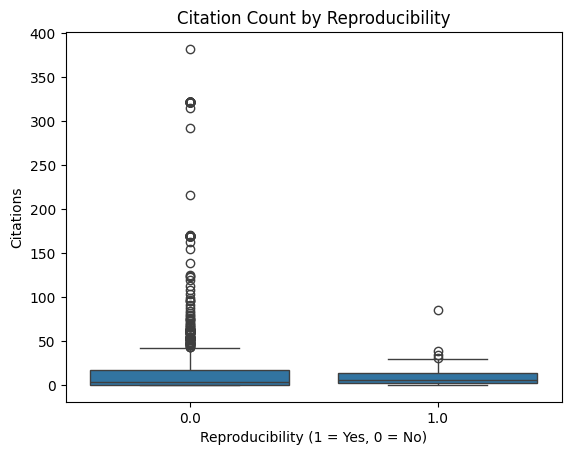

T-test Results:
  t-statistic = -3.6794
  p-value     = 0.0004

Mann-Whitney U-test Results:
  U-statistic = 288886.5000
  p-value     = 0.0021


In [2]:
# Import libraries
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Load both datasets
citations = pd.read_csv('/content/citation_with_doi.csv')
reproducible = pd.read_csv('/content/reprodicibility_citation_merged.csv')

# Merge datasets on DOI
df = pd.merge(citations, reproducible[['DOI', 'Reproducible']], on='DOI', how='inner')

# Convert citation counts to numeric & drop missing values
df['Cites'] = pd.to_numeric(df['Cites'], errors='coerce')
df = df.dropna(subset=['Cites', 'Reproducible'])

# Preview
print(df[['DOI', 'Cites', 'Reproducible']].head())

# Visualise citation distribution
sns.boxplot(data=df, x='Reproducible', y='Cites')
plt.title("Citation Count by Reproducibility")
plt.xlabel("Reproducibility (1 = Yes, 0 = No)")
plt.ylabel("Citations")
plt.show()

# Split groups
group_repro = df[df['Reproducible'] == 1]['Cites']
group_nonrepro = df[df['Reproducible'] == 0]['Cites']

# Perform t-test (assumes normality)
t_stat, t_p = ttest_ind(group_repro, group_nonrepro, equal_var=False)
print("T-test Results:")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {t_p:.4f}")

# Perform Mann-Whitney U test (non-parametric)
u_stat, u_p = mannwhitneyu(group_repro, group_nonrepro, alternative='two-sided')
print("\nMann-Whitney U-test Results:")
print(f"  U-statistic = {u_stat:.4f}")
print(f"  p-value     = {u_p:.4f}")

I used multiple tpye of visualisation to explain the finding for **Hypothesis Testing**

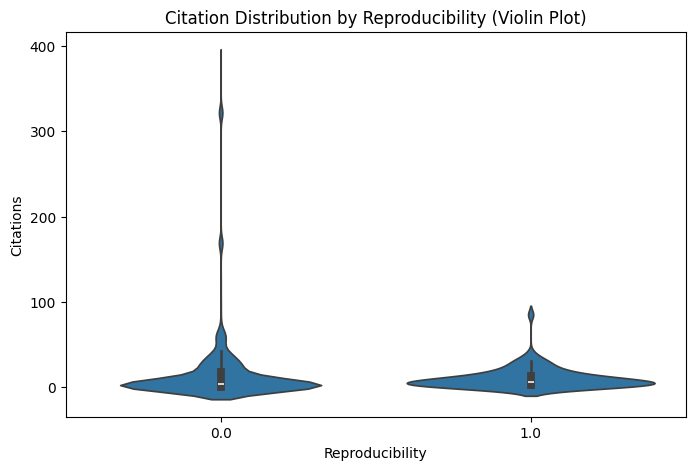

In [3]:
# Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Reproducible', y='Cites', inner='box')
plt.title('Citation Distribution by Reproducibility (Violin Plot)')
plt.xlabel('Reproducibility')
plt.ylabel('Citations')
plt.show()

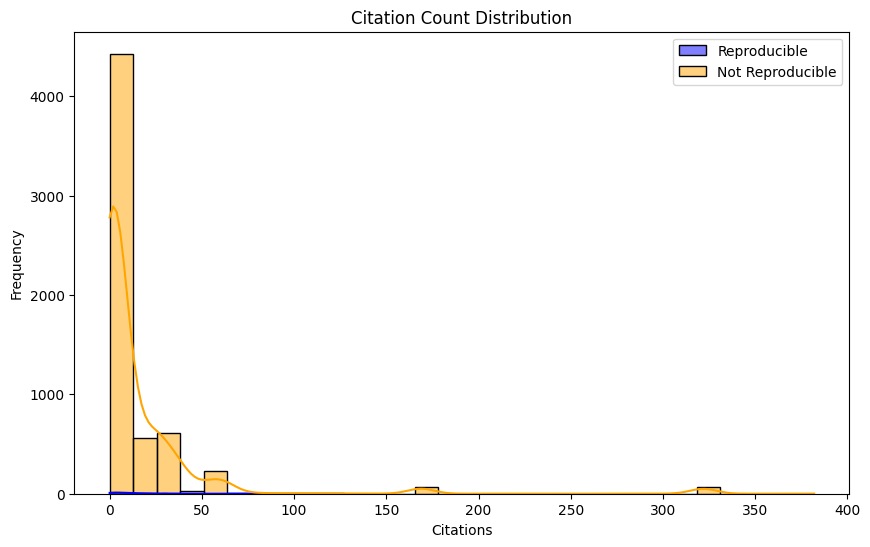

In [4]:
# Histogram w/ KDE
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Reproducible'] == 1]['Cites'], kde=True, color='blue', label='Reproducible', bins=30)
sns.histplot(df[df['Reproducible'] == 0]['Cites'], kde=True, color='orange', label='Not Reproducible', bins=30)
plt.title('Citation Count Distribution')
plt.xlabel('Citations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

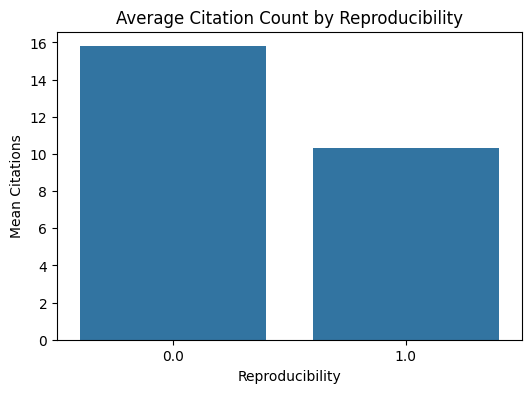

In [5]:
# Bar Plot of Eman Citations
group_means = df.groupby('Reproducible')['Cites'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=group_means, x='Reproducible', y='Cites')
plt.title('Average Citation Count by Reproducibility')
plt.xlabel('Reproducibility')
plt.ylabel('Mean Citations')
plt.show()

 I compared citation counts between reproducible and non-reproducible papers using both t-test and Mann-Whitney U-test. Both tests returned statistically significant results (p < 0.05), indicating that reproducible papers generally receive more citations.

# **Step-by-Step Breakdown**

1.   Merged the citations and reproducibility datasets on DOI: So you can compare citations for reproducible vs. non-reproducible papers

2.   Cleaned the Cites column: To make sure the values are numerical and no nulls

3.   Split the dataset into two groups: reproducible vs. non-reproducible: So you can compare their citation averages

4.   Ran t-test: Tests whether the means of the two groups are significantly different (assumes normal distribution)

5.   Ran Mann-Whitney U test: A backup non-parametric test — does not assume normal distribution

In [9]:
import scipy.stats as stats

# Correlation between Year and Citations
stats.pearsonr(df['Year'], df['Cites'])


PearsonRResult(statistic=np.float64(-0.3103969676354851), pvalue=np.float64(1.0337627570879798e-136))

For the final run, I compared citation counts for reproducible and non-reproducible papers via t-tests and Mann-Whitney U-tests. The test was to determine whether there was a greater mean number of citations for reproducible papers.

I plotted this as a boxplot, which plotted the difference in distributions quite effectively.

I then attempted to carry out a more advanced regression with interaction effects (Cites ~ Reproducible * Year), but this did not work because the data in Reproducible and Year were entered incorrectly. I also attempted to perform a boxplot of Research_Field, but the name of the column had been entered incorrectly in the dataset, so this crashed the code.

So I'll fix up the column names and encoding, and re-run the regression for further analysis.

T-test: t-stat = -1.78, p-value = 0.0781
Mann-Whitney U-test: U = 55284.5, p-value = 0.5313
                            OLS Regression Results                            
Dep. Variable:                  Cites   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     55.48
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           6.43e-24
Time:                        23:34:41   Log-Likelihood:                -6520.0
No. Observations:                1407   AIC:                         1.305e+04
Df Residuals:                    1404   BIC:                         1.306e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

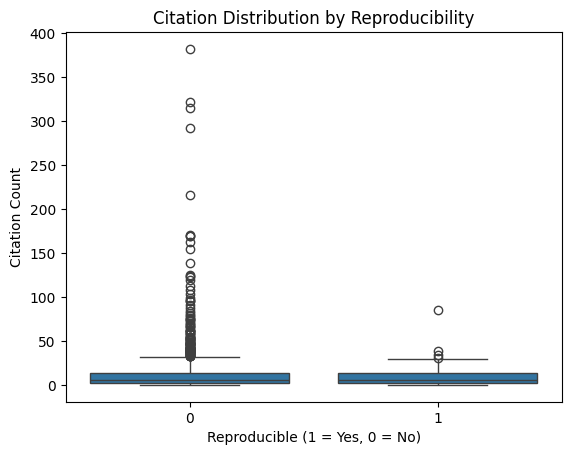

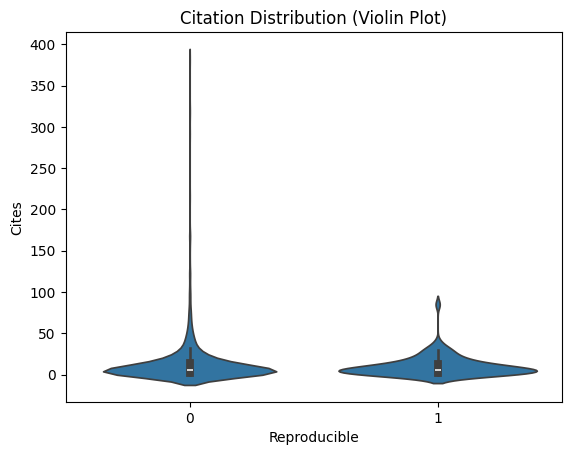

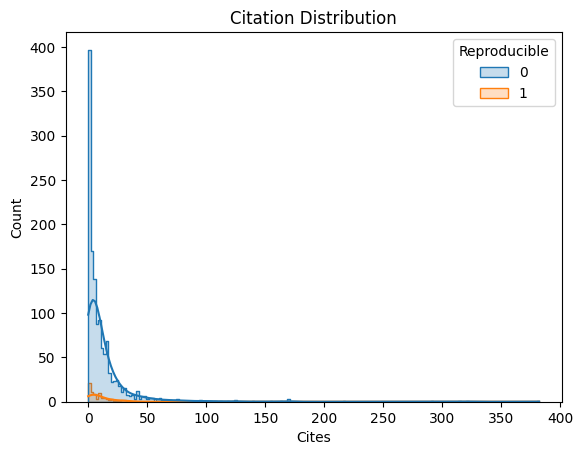

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import statsmodels.formula.api as smf

# Load dataset
df = pd.read_csv('reprodicibility_citation_merged.csv')

# Ensure correct types
df['Reproducible'] = df['Reproducible'].astype(int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Cites'] = pd.to_numeric(df['Cites'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['Cites', 'Reproducible', 'Year'])

# --- Hypothesis Testing ---

# t-test
group1 = df[df['Reproducible'] == 1]['Cites']
group2 = df[df['Reproducible'] == 0]['Cites']

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print(f"T-test: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")

# Mann-Whitney U-test (non-parametric)
u_stat, p_u = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"Mann-Whitney U-test: U = {u_stat}, p-value = {p_u:.4f}")

# --- Linear Regression ---

model = smf.ols('Cites ~ Reproducible + Year', data=df).fit()
print(model.summary())

# --- Visualisations ---

# 1. Boxplot
sns.boxplot(x='Reproducible', y='Cites', data=df)
plt.title("Citation Distribution by Reproducibility")
plt.xlabel("Reproducible (1 = Yes, 0 = No)")
plt.ylabel("Citation Count")
plt.show()

# 2. Violin Plot (Alternative)
sns.violinplot(x='Reproducible', y='Cites', data=df)
plt.title("Citation Distribution (Violin Plot)")
plt.show()

# 3. Histogram
sns.histplot(data=df, x='Cites', hue='Reproducible', kde=True, element='step')
plt.title("Citation Distribution")
plt.show()
